<a href="https://colab.research.google.com/github/SecrezS/MACDforecasting/blob/main/ANL488_Proposal_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Historical Price Data for SPY from Yahoo Finance (Daily MACD)

In [1]:
# Import libraries
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import seaborn as sns

## Data Collection

In [2]:
# Downloading SPY data from 2018 to 2022 using yfinance
ticker = "SPY"
data = yf.download(ticker, start="2018-01-01", end="2022-01-01")

# Reset the index to move the 'Date' index into a regular column
data.reset_index(inplace=True)

data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,267.839996,268.809998,267.399994,268.769989,241.540146,86655700
1,2018-01-03,268.959991,270.640015,268.959991,270.470001,243.067902,90070400
2,2018-01-04,271.200012,272.160004,270.540009,271.609985,244.092346,80636400
3,2018-01-05,272.510010,273.559998,271.950012,273.420013,245.719086,83524000
4,2018-01-08,273.309998,274.100006,272.980011,273.920013,246.168442,57319200


## Data Cleaning





In [3]:
# Check for missing values
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


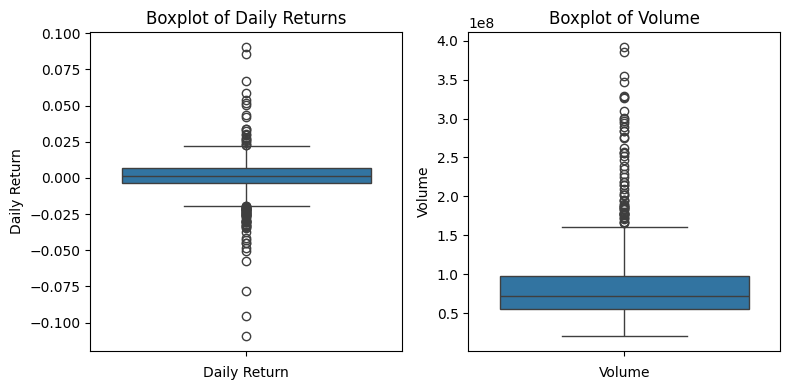

In [4]:
# Calculate Daily Returns (percentage change in Adjusted Close price)
data['Daily Return'] = data['Adj Close'].pct_change()

# Drop the first row due to NaN value in Daily Return
data = data.dropna(subset=['Daily Return'])

# Set up the figure for the boxplots
plt.figure(figsize=(8, 4))

# Boxplot for Daily Returns
plt.subplot(1, 2, 1)
sns.boxplot(data['Daily Return'])
plt.title('Boxplot of Daily Returns')
plt.xlabel('Daily Return')

# Boxplot for Volume
plt.subplot(1, 2, 2)
sns.boxplot(data['Volume'])
plt.title('Boxplot of Volume')
plt.xlabel('Volume')

# Show the boxplots
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

In [5]:
# Keep 'Date' as a column and also set it as the index
data['Date_Column'] = data['Date']  # Create a copy of the Date column
data.set_index('Date', inplace=True)  # Set Date as the index

<ipython-input-5-25c5d67cf359>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_Column'] = data['Date']  # Create a copy of the Date column


<Figure size 640x480 with 0 Axes>

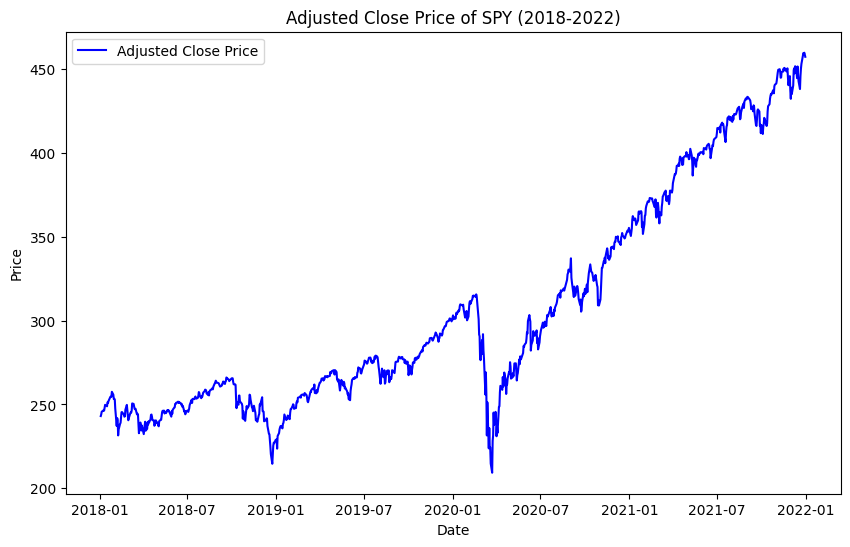

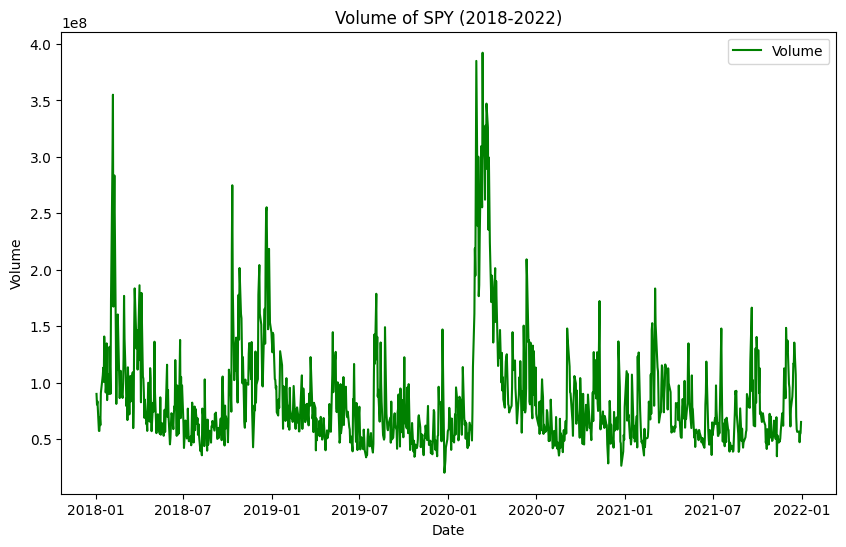

In [7]:
# Format the x-axis to show dates properly
plt.gcf().autofmt_xdate()

# Plot Adjusted Close Price
plt.figure(figsize=(10, 6))
plt.plot(data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title('Adjusted Close Price of SPY (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Volume
plt.figure(figsize=(10, 6))
plt.plot(data['Volume'], label='Volume', color='green')
plt.title('Volume of SPY (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

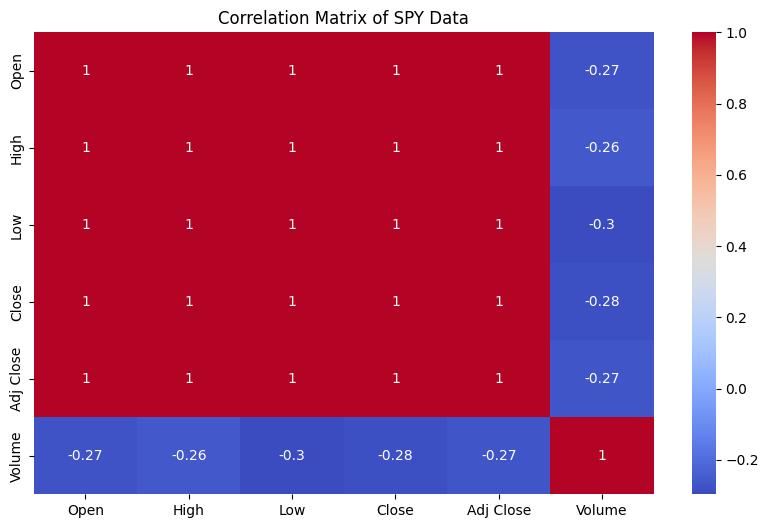

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of SPY Data')
plt.show()

In [9]:
# List of columns to drop
columns_to_drop = ['Open', 'High', 'Low', 'Close']

# Drop the columns from the DataFrame and keep the DataFrame name as 'data'
data = data.drop(columns=columns_to_drop)

# Check the first few rows to confirm the columns were dropped
print(data.head())

             Adj Close    Volume  Daily Return Date_Column
Date                                                      
2018-01-03  243.067902  90070400      0.006325  2018-01-03
2018-01-04  244.092346  80636400      0.004215  2018-01-04
2018-01-05  245.719086  83524000      0.006664  2018-01-05
2018-01-08  246.168442  57319200      0.001829  2018-01-08
2018-01-09  246.725555  57254000      0.002263  2018-01-09


In [10]:
# Calculate MACD, Signal Line, and MACD Histogram

# Calculate EMA12 and EMA26
data['EMA12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD (difference between EMA12 and EMA26)
data['MACD'] = data['EMA12'] - data['EMA26']

# Calculate the Signal Line (9-period EMA of the MACD)
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# MACD Histogram
data['MACD Histogram'] = data['MACD'] - data['Signal Line']

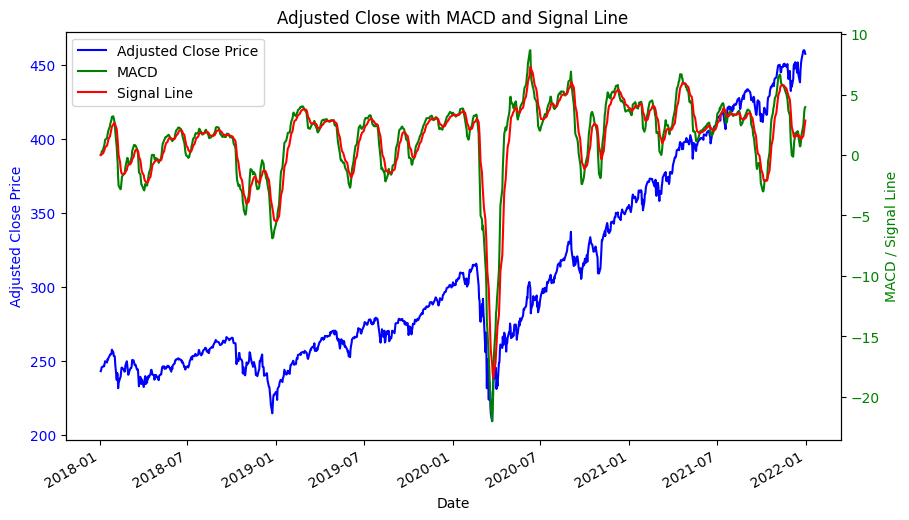

In [11]:
# Plot Adjusted Close on the primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Adjusted Close with MACD and Signal Line')
ax1.set_xlabel('Date')

# Plot Adjusted Close on the primary y-axis
ax1.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='blue')
ax1.set_ylabel('Adjusted Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for MACD and Signal Line
ax2 = ax1.twinx()

# Plot MACD and Signal Line on the secondary y-axis
ax2.plot(data.index, data['MACD'], label='MACD', color='green')
ax2.plot(data.index, data['Signal Line'], label='Signal Line', color='red')
ax2.set_ylabel('MACD / Signal Line', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Format the x-axis to display dates properly
plt.gcf().autofmt_xdate()

plt.show()

## Feature Engineering

In [11]:
# Creating lagged features for MACD, Signal Line and Volume
data['MACD Lag1'] = data['MACD'].shift(1)
data['MACD Lag2'] = data['MACD'].shift(2)
data['Signal Line Lag1'] = data['Signal Line'].shift(1)
data['Signal Line Lag2'] = data['Signal Line'].shift(2)
data['Volume Lag1'] = data['Volume'].shift(1)

## Data Transformation

In [12]:
# Drop the first 26 rows to ensure valid MACD and Signal Line values
data = data.iloc[26:].copy()

# Reset the index
data.reset_index(drop=True, inplace=True)

# Print to verify that the initial rows are removed
print(data.head())

    Adj Close     Volume  Daily Return Date_Column       EMA12       EMA26  \
0  235.006714  283565300      0.015022  2018-02-09  243.409452  245.958119   
1  238.457687  143736000      0.014685  2018-02-12  242.647642  245.402532   
2  239.050781   81223600      0.002487  2018-02-13  242.094279  244.932032   
3  242.277054  120735700      0.013496  2018-02-14  242.122398  244.735367   
4  245.368484  111200300      0.012760  2018-02-15  242.621796  244.782264   

       MACD  Signal Line  MACD Histogram  MACD Lag1  MACD Lag2  \
0 -2.548667    -0.030861       -2.517806  -1.897009  -0.683543   
1 -2.754889    -0.575667       -2.179223  -2.548667  -1.897009   
2 -2.837753    -1.028084       -1.809669  -2.754889  -2.548667   
3 -2.612968    -1.345061       -1.267908  -2.837753  -2.754889   
4 -2.160468    -1.508142       -0.652326  -2.612968  -2.837753   

   Signal Line Lag1  Signal Line Lag2  Volume Lag1  
0          0.598591          1.222491  246449500.0  
1         -0.030861         